## <strong> 7. 데이터셋 결합 </strong>

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

### <strong> 1차원 데이터(List, Series)의 연결
---

In [2]:
# List 객체 생성
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]

# [+] numpy.concatenate()를 이용한 단순 연결
np.concatenate([x, y, z])  # [1 2 3 4 5 6 7 8 9]


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Series 객체 생성
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])

# [+] pd.concat()을 이용한 두 개의 Series 연결
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

### <strong> 2차원 데이터(DataFrame)의 연결 </strong>
---

In [ ]:
# DataFrame 생성 함수
def make_df(cols, ind):
    data = {c: [str(c) + str(i) for i in ind]
           for c in cols}

    return pd.DataFrame(data, ind)

print(make_df('ABC', [1, 2]))  #column명과 인덱스 조합

    A   B   C
1  A1  B1  C1
2  A2  B2  C2


In [11]:
# DataFrame 객체 생성,, 컬론명은 같지만 인덱스가 다르게 만듬
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])

print(df1, '\n')
print(df2, '\n')

# pd.concat()을 이용한 DataFrame 연결
pd.concat([df1, df2]) #데이터 프레임을 연결하면 행방향으로 연결함

    A   B
1  A1  B1
2  A2  B2 

    A   B
3  A3  B3
4  A4  B4 



,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [12]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])

print(df3, '\n')
print(df4, '\n')

# [+] DataFrame을 열 방향으로 연결 /////////////////////////axis 0(default)은 행방향 1은 열방향으로 알고있어야함
pd.concat([df3,df4], axis=1)

    A   B
0  A0  B0
1  A1  B1 

    C   D
0  C0  D0
1  C1  D1 



,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


### <strong> ```pd.concat()``` 연결 옵션 </strong>

In [13]:
# pandas는 기본적으로 인덱스 중복을 허용한다.

x = make_df('AB', [0, 1])
y = make_df('AB', [0, 1])

print(x, '\n')
print(y, '\n')

pd.concat([x, y])

    A   B
0  A0  B0
1  A1  B1 

    A   B
0  A0  B0
1  A1  B1 



,A,B
0,A0,B0
1,A1,B1
0,A0,B0
1,A1,B1


In [16]:
# [+] 연결 옵션: 인덱스 중복 에러 처리

try:
    pd.concat([x,y], verify_integrity=True)
    # 인텍스 중복을 허용하지 않기 떄문에 에러가 발생하게 됨
except ValueError as e:
    print('ValueError:', e)#자바에서 try catch와 비슷한데 그냥 알고 넘어가기


ValueError: Indexes have overlapping values: Index([0, 1], dtype='int64')


In [17]:
# [+] 연결 옵션: 기존 인덱스 무시 (인덱스 재생성
pd.concat([x,y], ignore_index=True) #ignore_index=True를 설정하면 인덱스가 0부터 시작하게 됨

,A,B
0,A0,B0
1,A1,B1
2,A0,B0
3,A1,B1


#### ```concat()```의 조인 옵션
서로 다른 열 집합을 가지는 DataFrame 객체를 연결
+ ```join='outer'```: 외부 조인(합집합, 디폴트 옵션)
+ ```join='inner'```: 내부 조인(교집합)

### join은 합지는 데이터 프레임에 있는 공통부분을 기준으로 합침
### 교집합은 공통 인덱스만 남김
### 합집합은 없는 부분에 대해서 NaN으로 채움

In [21]:
# DataFrame 객체 생성
x = make_df('ABC', [1, 2])
y = make_df('BCD', [3, 4])

print(x, '\n')
print(y, '\n')


# [+] 외부 조인
pd.concat([x,y], join='outer') #join='outer'는 외부 조인으로 NaN이 들어감

    A   B   C
1  A1  B1  C1
2  A2  B2  C2 

    B   C   D
3  B3  C3  D3
4  B4  C4  D4 



,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [22]:
# [+] 내부 조인
pd.concat([x,y], join='inner') #join='inner'는 내부 조인으로 공통된 컬럼만 남김

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


### <strong> DataFrame의 병합 및 조인 </strong>
---
+ 일대일 조인
+ 다대일 조인
+ 다대다 조인

In [25]:
# 직원 별 부서 정보에 대한 DataFrame
df1 = pd.DataFrame({
    'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']
})

# 직원 별 입사년도에 대한 DataFrame
df2 = pd.DataFrame({
    'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
    'hire_date': [2004, 2008, 2012, 2014]
})


print(df1, '\n')
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR 

  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [26]:
# 일대일 조인
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [27]:
# 다대일 조인

# 그룹 별 관리자에 대한 DataFrame
df4 = pd.DataFrame({
    'group': ['Accounting', 'Engineering', 'HR'],
    'supervisor': ['Carly', 'Guido', 'Steve']
})

print(df3, '\n')
print(df4, '\n')

pd.merge(df3, df4)

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014 

         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve 



,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [28]:
# 다대다 조인

# 그룹 별 요구역량에 대한 DataFrame
df5 = pd.DataFrame({
    'group': ['Accounting', 'Accounting',
              'Engineering', 'Engineering',
              'HR', 'HR'],
    'skills': ['math', 'spreadsheets', 'coding',
            'linux', 'spreadsheets', 'organization']
})

print(df1, '\n')
print(df5, '\n')

pd.merge(df1, df5)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR 

         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization 



,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


#### ```pd.merge()``` 병합 옵션

In [29]:
# 두 DataFrame에 공통 열('age') 추가
df1['age'] = pd.Series([20, 42, 37, 25])
df2['age'] = pd.Series([37, 20, 42, 25])

print(df1, '\n')
print(df2, '\n')

# [+] on 매개변수를 이용하여 `employee`를 병합 키로 사용
pd.merge(df1,df2, on='employee') #on 매개변수에 병합할 키를 지정하면 됨

  employee        group  age
0      Bob   Accounting   20
1     Jake  Engineering   42
2     Lisa  Engineering   37
3      Sue           HR   25 

  employee  hire_date  age
0     Lisa       2004   37
1      Bob       2008   20
2     Jake       2012   42
3      Sue       2014   25 



,employee,group,age_x,hire_date,age_y
0,Bob,Accounting,20,2008,20
1,Jake,Engineering,42,2012,42
2,Lisa,Engineering,37,2004,37
3,Sue,HR,25,2014,25


In [ ]:
# 직원 별 월급에 대한 DataFrame
df6 = pd.DataFrame({
    'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'salary': [70000, 80000, 120000, 90000]
})

print(df1, '\n')
print(df6, '\n')

# [+] left_on과 'right_on' 매개변수를 이용한 병합키 지정
pd.merge(
    df1, 
    df6, 
    left_on='employee', #첫번째 데이터 프레임의 공통키
    right_on='name'     #두번째 데이터 프레임의 공통키
)##똑같은 정보지만 컬론명이 달라서 중복이 생길 수 있음
#이름이 다르기 때문에 left_on과 right_on을 이용해서 병합키를 지정해줘야함

  employee        group  age
0      Bob   Accounting   20
1     Jake  Engineering   42
2     Lisa  Engineering   37
3      Sue           HR   25 

   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000 



,employee,group,age,name,salary
0,Bob,Accounting,20,Bob,70000
1,Jake,Engineering,42,Jake,80000
2,Lisa,Engineering,37,Lisa,120000
3,Sue,HR,25,Sue,90000


#### 인덱스를 이용한 병합

In [ ]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')

print(df1a, '\n')
print(df2a, '\n')

# 인덱스를 이용한 병합
pd.merge(df1a, df2a, left_index=True, right_index=True)# set_idex를 사용하면 특정 컬럼을 인덱스로 설정하고 병합할 수 있음,employee

                group  age
employee                  
Bob        Accounting   20
Jake      Engineering   42
Lisa      Engineering   37
Sue                HR   25 

          hire_date  age
employee                
Lisa           2004   37
Bob            2008   20
Jake           2012   42
Sue            2014   25 



,group,age_x,hire_date,age_y
employee,,,,
Bob,Accounting,20,2008,20
Jake,Engineering,42,2012,42
Lisa,Engineering,37,2004,37
Sue,HR,25,2014,25


#### ```merge()``` 조인 옵션

concat은 합교집합만 있었는데 
merge()은 4가지 옵션을 통해서 조인을 진행할 수 있음
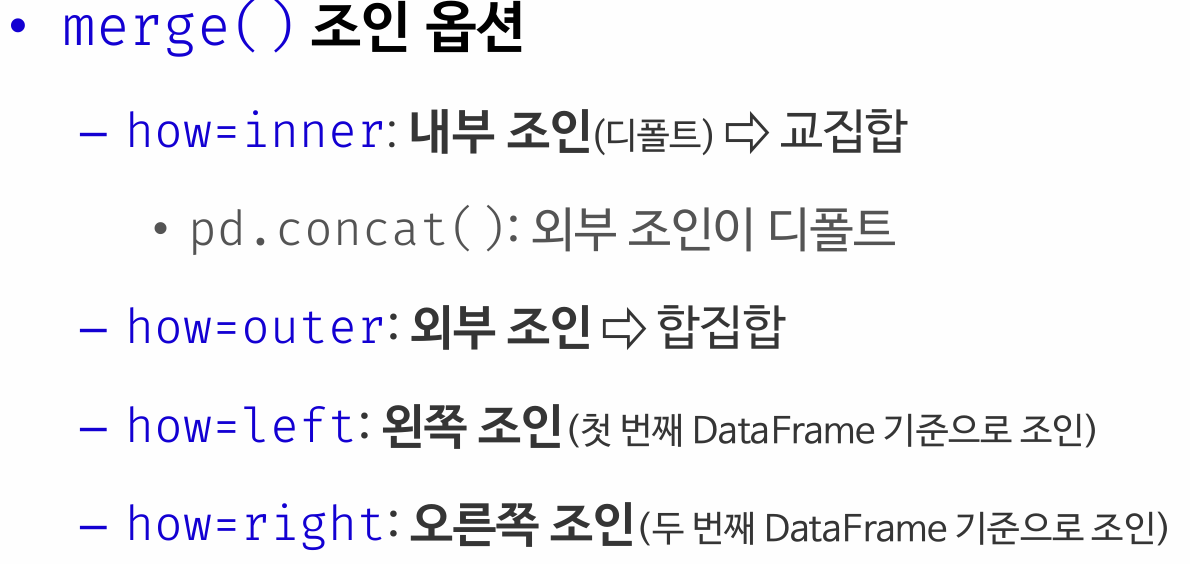
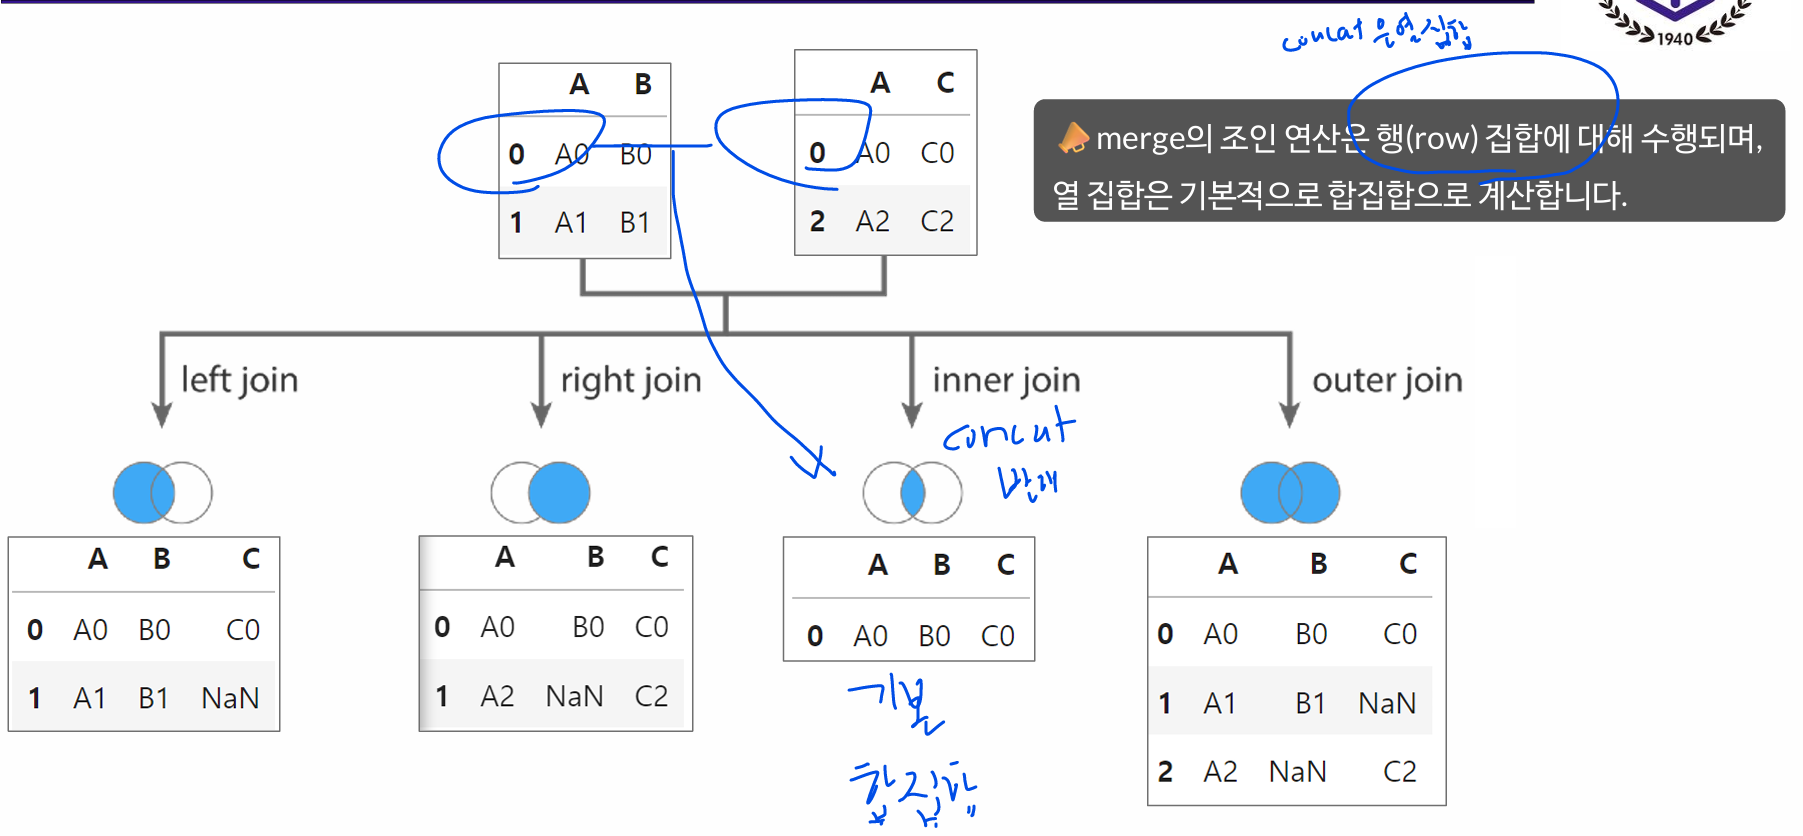

In [ ]:
df1 = make_df('AB', [0, 1])
df2 = make_df('AC', [0, 2])

print(df1, '\n')
print(df2, '\n')
#결과 한번씩 확인해보기 약속쿠~~
pd.merge(df1, df2, how='right')
pd.merge(df1, df2, how='left')
pd.merge(df1, df2, how='outer')
pd.merge(df1, df2, how='inner')

    A   B
0  A0  B0
1  A1  B1 

    A   C
0  A0  C0
2  A2  C2 



,A,B,C
0,A0,B0,C0
